In [ ]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import re as re
import seaborn as sns

In [341]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

In [3]:
#get data
rawData = pd.read_csv("C:/Users/mkelly/Desktop/Capstone Project/titanic.csv", header = 0)

In [4]:
rawData.describe()

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
Survived                              1309 non-null object
Passenger Class                       1309 non-null object
Name                                  1309 non-null object
Sex                                   1309 non-null object
Age                                   1046 non-null float64
No of Siblings or Spouses on Board    1309 non-null float64
No of Parents or Children on Board    1309 non-null float64
Ticket Number                         1309 non-null object
Passenger Fare                        1308 non-null float64
Cabin                                 295 non-null object
Port of Embarkation                   1307 non-null object
Life Boat                             486 non-null object
dtypes: float64(4), object(8)
memory usage: 122.9+ KB


In [6]:
del rawData['Cabin']

In [7]:
del rawData['Life Boat']

In [8]:
del rawData['Name']

In [9]:
del rawData['Ticket Number']

In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
Survived                              1309 non-null object
Passenger Class                       1309 non-null object
Sex                                   1309 non-null object
Age                                   1046 non-null float64
No of Siblings or Spouses on Board    1309 non-null float64
No of Parents or Children on Board    1309 non-null float64
Passenger Fare                        1308 non-null float64
Port of Embarkation                   1307 non-null object
dtypes: float64(4), object(4)
memory usage: 82.0+ KB


In [11]:
#remove missing records
rawData = rawData.dropna()

In [12]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
Survived                              1043 non-null object
Passenger Class                       1043 non-null object
Sex                                   1043 non-null object
Age                                   1043 non-null float64
No of Siblings or Spouses on Board    1043 non-null float64
No of Parents or Children on Board    1043 non-null float64
Passenger Fare                        1043 non-null float64
Port of Embarkation                   1043 non-null object
dtypes: float64(4), object(4)
memory usage: 73.3+ KB


In [74]:
#Change attribute types
rawData['Survived'] = rawData['Survived'].astype('category')
rawData['Passenger Class'] = rawData['Passenger Class'].astype('category')
rawData['Sex'] = rawData['Sex'].astype('category')
rawData['Port of Embarkation'] =  rawData['Port of Embarkation'].astype('category')

In [49]:
#encode string variables...? 
rawData['Survived'] = rawData['Survived'].map({'No':0, 'Yes':1})

In [50]:
rawData['Survived'].describe()

count    1043.000000
mean        0.407478
std         0.491601
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Survived, dtype: float64

In [53]:
rawData['Passenger Class'] = rawData['Passenger Class'].map({"First":0, "Second":1, "Third":2})

In [54]:
rawData['Passenger Class'].describe()

count    1043.000000
mean        1.209012
std         0.840685
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Passenger Class, dtype: float64

In [55]:
rawData['Port of Embarkation'] = rawData['Port of Embarkation'].map({'Cherbourg':0, 'Queenstown':1, 'Southampton':2})

In [56]:
rawData['Port of Embarkation'].describe()

count    1043.000000
mean        1.545542
std         0.809366
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Port of Embarkation, dtype: float64

In [57]:
rawData['Sex'] = rawData['Sex'].map({"Male":0, "Female":1})

In [58]:
rawData['Sex'].describe()

count    1043.000000
mean        0.370086
std         0.483059
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Sex, dtype: float64

(array([618.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 425.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

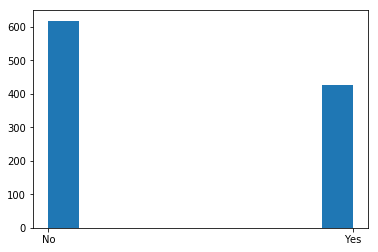

In [14]:
#plot histograms
plt.hist(rawData['Survived'])

(array([282.,   0.,   0.,   0.,   0., 261.,   0.,   0.,   0., 500.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

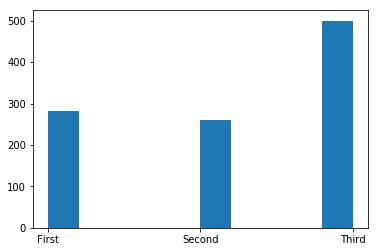

In [15]:
plt.hist(rawData['Passenger Class'])

(array([212.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0., 781.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

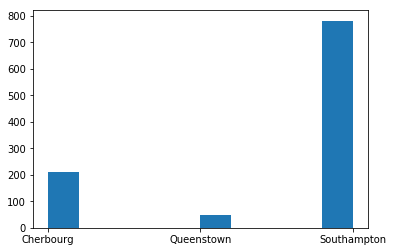

In [17]:
plt.hist(rawData['Port of Embarkation'])

(array([386.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 657.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

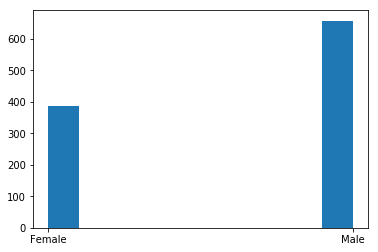

In [18]:
plt.hist(rawData['Sex'])

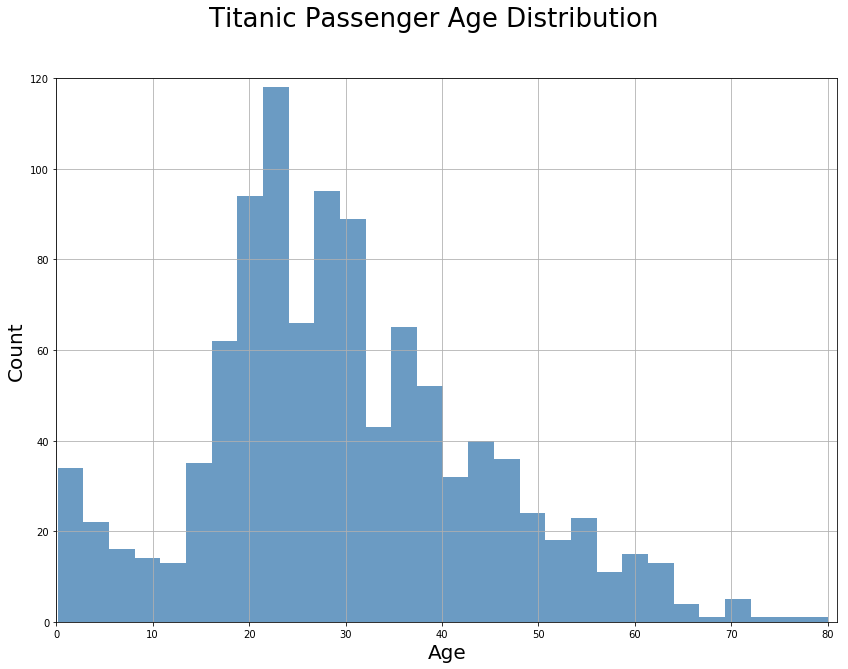

In [315]:
ax = rawData['Age'].hist(bins=30, color='steelblue', alpha=0.8, figsize=(14,10))
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.suptitle('Titanic Passenger Age Distribution', fontsize=26)
ax.set_ylim(0, 120)
ax.set_xlim(0, 81)
plt.show()

(array([682., 280.,  36.,  16.,   0.,  22.,   6.,   0.,   0.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

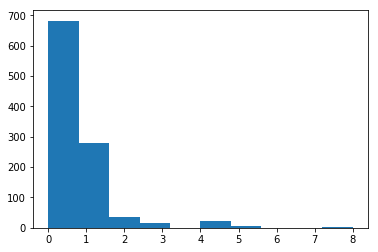

In [21]:
plt.hist(rawData['No of Siblings or Spouses on Board'])

In [344]:
plt.hist(rawData['No of Parents or Children on Board'])

KeyError: 'No of Parents or Children on Board'

In [26]:
#describe attributes
print('Age')
print(rawData['Age'].describe())
print( )
print('Sex')
print(rawData['Sex'].describe())
print( )
print('Survived?')
print(rawData['Survived'].describe())
print( )
print('# of spouses or siblings')
print(rawData['No of Siblings or Spouses on Board'].describe())
print( )
print('# of parents or children')
print(rawData['No of Parents or Children on Board'].describe())
print( )
print('Class #')
print(rawData['Passenger Class'].describe())
print( )
print('Embarked from')
print(rawData['Port of Embarkation'].describe())
print( )
print('Ticket price')
print(rawData['Passenger Fare'].describe())

Age
count    1043.000000
mean       29.813199
std        14.366261
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Sex
count     1043
unique       2
top       Male
freq       657
Name: Sex, dtype: object

Survived?
count     1043
unique       2
top         No
freq       618
Name: Survived, dtype: object

# of spouses or siblings
count    1043.000000
mean        0.504314
std         0.913080
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: No of Siblings or Spouses on Board, dtype: float64

# of parents or children
count    1043.000000
mean        0.421860
std         0.840655
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: No of Parents or Children on Board, dtype: float64

Class #
count      1043
unique        3
top       Third
freq        500
Name: Passenger Class, dtype: object

In [76]:
#select features and dependent variable
features = rawData.iloc[:,1:7]

In [91]:
rawData['Survived'] = rawData['Survived'].astype('category')

In [99]:
depVar = rawData['Survived'].astype('category')

In [100]:
depVar.describe()

count     1043
unique       2
top          0
freq       618
Name: Survived, dtype: int64

In [101]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 6 columns):
Passenger Class                       1043 non-null category
Sex                                   1043 non-null category
Age                                   1043 non-null float64
No of Siblings or Spouses on Board    1043 non-null float64
No of Parents or Children on Board    1043 non-null float64
Passenger Fare                        1043 non-null float64
dtypes: category(2), float64(4)
memory usage: 83.0 KB


In [102]:
#do math
print(1043*.75)
print(1043*.25)

782.25
260.75


In [133]:
#establish train/test sets
x_train = features[: -260]
y_train = depVar[: -260]

In [134]:
#test sets
x_test = features[: -783]
y_test = depVar[: -783]

In [135]:
#check counts
x_train_count = len(x_train.index)
y_train_count = len(y_train.index)
x_test_count = len(x_test.index)
y_test_count = len(y_test.index)

In [136]:
print(x_train_count)
print(y_train_count)
print(x_test_count)
print(y_test_count)

783
783
260
260


In [137]:
#train/test split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [138]:
x_train.shape, x_test.shape

((587, 6), (196, 6))

In [139]:
y_train.shape, y_test.shape

((587,), (196,))

In [140]:
#decision tree
from sklearn import tree

In [141]:
clf = tree.DecisionTreeClassifier()

In [142]:
clf = clf.fit(x_train, y_train)

In [143]:
print(cross_val_score(clf, x_train, y_train, cv=10))

[0.76666667 0.76666667 0.76271186 0.74576271 0.72881356 0.82758621
 0.74137931 0.70689655 0.81034483 0.72413793]


In [144]:
clfpredictions = clf.predict(x_test)
print(clfpredictions)

[0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 0 0 0 1 1 0]


In [145]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

In [146]:
confusion_matrix(y_test, clfpredictions)

array([[85, 17],
       [20, 74]], dtype=int64)

In [147]:
y_pred = clfpredictions

In [148]:
y_true = y_test

In [152]:
accuracy_score(y_true, y_pred)

0.8112244897959183

In [153]:
#81.1% accuracy

In [154]:
cohen_kappa_score(y_true, y_pred)

0.621345029239766

In [160]:
#.62 kappa

In [168]:
clf.score(x_train, y_train)

0.9880749574105622

In [ ]:
## Decision Tree Classifier Summary - 81% Accuracy, .62 Kappa, .99 model score

In [156]:
#KNN Classification

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
kmodel = KNeighborsClassifier()

In [159]:
kmodel = kmodel.fit(x_train, y_train)

In [162]:
kpred = kmodel.predict(x_test)

In [163]:
confusion_matrix(y_true, kpred)

array([[75, 27],
       [39, 55]], dtype=int64)

In [164]:
accuracy_score(y_true, kpred)

0.6632653061224489

In [165]:
cohen_kappa_score(y_true, kpred)

0.32201257861635224

In [167]:
kmodel.score(x_train, y_train)

0.7495741056218058

In [169]:
#KNN SUMMARY - 66.3% Accuracy, .32 Kappa, .75 Model Score
## Decision Tree Classifier Summary - 81% Accuracy, .62 Kappa, .99 model score

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [171]:
boost = AdaBoostClassifier()

In [172]:
boost = boost.fit(x_train, y_train)

In [173]:
boostpred = boost.predict(x_test)

In [174]:
confusion_matrix(y_true, boostpred)

array([[83, 19],
       [20, 74]], dtype=int64)

In [177]:
accuracy_score(y_true, boostpred)

0.8010204081632653

In [179]:
cohen_kappa_score(y_true, boostpred)

0.6012103505843072

In [180]:
boost.score(x_train, y_train)

0.8432708688245315

In [181]:
#AdaBoost summary - 80% accuracy, .6 kappa, .84 model score
#KNN SUMMARY - 66.3% Accuracy, .32 Kappa, .75 Model Score
## Decision Tree Classifier Summary - 81% Accuracy, .62 Kappa, .99 model score

In [182]:
#Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rfmodel = RandomForestClassifier()

In [185]:
rfmodel = rfmodel.fit(x_train, y_train)

In [186]:
rfpred = rfmodel.predict(x_test)

In [187]:
confusion_matrix(y_true, rfpred)

array([[87, 15],
       [21, 73]], dtype=int64)

In [188]:
accuracy_score(y_true, rfpred)

0.8163265306122449

In [189]:
cohen_kappa_score(y_true, rfpred)

0.6311166875784191

In [190]:
rfmodel.score(x_train, y_train)

0.9744463373083475

In [191]:
#RF summary 81.6% accuracy, .63 Kappa, .97 model score
#AdaBoost summary - 80% accuracy, .6 kappa, .84 model score
#KNN SUMMARY - 66.3% Accuracy, .32 Kappa, .75 Model Score
## Decision Tree Classifier Summary - 81% Accuracy, .62 Kappa, .99 model score

In [192]:
#feature importance

In [194]:
from sklearn.ensemble import ExtraTreesClassifier

In [195]:
extramodel = ExtraTreesClassifier()

In [196]:
extramodel = extramodel.fit(x_train, y_train)

In [197]:
extrapred = extramodel.predict(x_test)

In [199]:
importances = extramodel.feature_importances_

In [200]:
std = np.std([extramodel.feature_importances_ for tree in extramodel.estimators_],
            axis=0)

In [201]:
indices = np.argsort(importances)[::-1]

In [202]:
print("feature importance")
for f in range(x_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature importance
1. feature 1 (0.383651)
2. feature 5 (0.244986)
3. feature 2 (0.235334)
4. feature 0 (0.061967)
5. feature 3 (0.038166)
6. feature 4 (0.035896)


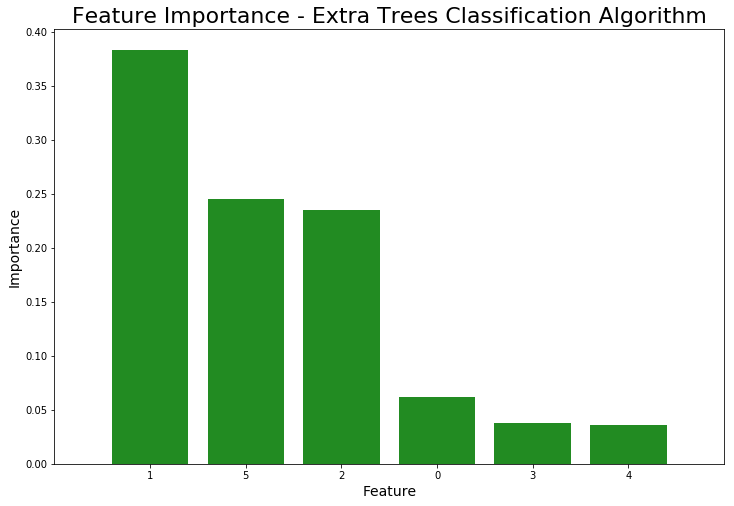

In [331]:
plt.figure(figsize=(12,8))
plt.title("Feature Importance - Extra Trees Classification Algorithm", fontsize=22)
plt.bar(range(x_test.shape[1]), importances[indices],
       color="forestgreen", yerr=std[indices], align='center')
plt.xticks(range(x_test.shape[1]), indices)
plt.xlim([-1, x_test.shape[1]])
plt.ylabel("Importance", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.show()

In [205]:
print('feature 1 = Sex')
print('feature 5 = Passenger Fare')
print('feature 2 = Age')
print('feature 0 = Passenger Class')
print('feature 3 = # of Siblings/Spouses')
print('feature 4 = # of Parents/Children')

feature 1 = Sex
feature 5 = Passenger Fare
feature 2 = Age
feature 0 = Passenger Class
feature 3 = # of Siblings/Spouses
feature 4 = # of Parents/Children


In [206]:
accuracy_score(y_true, extrapred)

0.7959183673469388

In [207]:
#Extra Trees accuracy 80%

In [208]:
cohen_kappa_score(y_true, extrapred)

0.59012965286491

In [209]:
extramodel.score(x_train, y_train)

0.9880749574105622

In [211]:
#Extra Trees summary 80% accuracy, .59 kappa, .98 model score
#RF summary 81.6% accuracy, .63 Kappa, .97 model score
#AdaBoost summary - 80% accuracy, .6 kappa, .84 model score
#KNN SUMMARY - 66.3% Accuracy, .32 Kappa, .75 Model Score
## Decision Tree Classifier Summary - 81% Accuracy, .62 Kappa, .99 model score

In [216]:
model_stats = """
Model Performance Summary

RandomForest = 81.6% Accuracy | .63 Kappa | .97 Model Score
DecisionTreeClassifier = 81% Accuracy | .62 Kappa | .99 Model Score
AdaBoostClassifier = 80% Accuracy | .60 Kappa | .84 Model Score
ExtraTreesClassifier = 80% Accuracy | .59 Kappa | .98 Model Score
KNeighborsClassifier = 66.3% Accuracy | .32 Kappa | .75 Model Score
"""
print(model_stats)



Model Performance Summary

RandomForest = 81.6% Accuracy | .63 Kappa | .97 Model Score
DecisionTreeClassifier = 81% Accuracy | .62 Kappa | .99 Model Score
AdaBoostClassifier = 80% Accuracy | .60 Kappa | .84 Model Score
ExtraTreesClassifier = 80% Accuracy | .59 Kappa | .98 Model Score
KNeighborsClassifier = 66.3% Accuracy | .32 Kappa | .75 Model Score



In [222]:
numericData = rawData

In [227]:
numericData['Survived'] = numericData['Survived'].astype('float64')
numericData['Passenger Class'] = numericData['Passenger Class'].astype('float64')
numericData['Sex'] = numericData['Sex'].astype('float64')
numericData['Port of Embarkation'] = numericData['Port of Embarkation'].astype('float64')

In [230]:
#additional visuals - Correlate
corr = numericData[["Survived", "Sex", "Passenger Fare", "Age", "Passenger Class", "No of Siblings or Spouses on Board", "No of Parents or Children on Board"]].corr()
np.abs(corr["Survived"]).sort_values(ascending=False)

Survived                              1.000000
Sex                                   0.536332
Passenger Class                       0.317737
Passenger Fare                        0.247858
No of Parents or Children on Board    0.115436
Age                                   0.057416
No of Siblings or Spouses on Board    0.011403
Name: Survived, dtype: float64

In [232]:
import seaborn as sns

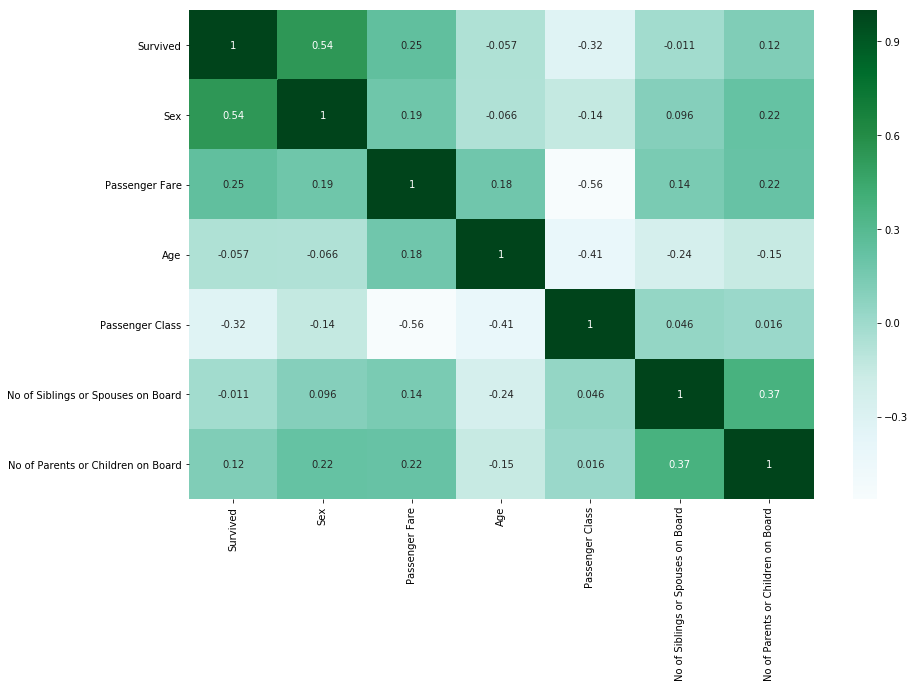

In [330]:
plt.subplots(figsize=(14, 9))
sns.heatmap(corr, cmap="BuGn", annot=True)
plt.show()

In [ ]:
#combine siblings, parents, children, etc.... grandmas grandpas 3rd cousins

In [237]:
numericData['famSize'] = numericData['No of Siblings or Spouses on Board'] + numericData['No of Parents or Children on Board']

In [239]:
numericData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 9 columns):
Survived                              1043 non-null float64
Passenger Class                       1043 non-null float64
Sex                                   1043 non-null float64
Age                                   1043 non-null float64
No of Siblings or Spouses on Board    1043 non-null float64
No of Parents or Children on Board    1043 non-null float64
Passenger Fare                        1043 non-null float64
Port of Embarkation                   1043 non-null float64
famSize                               1043 non-null float64
dtypes: float64(9)
memory usage: 121.5 KB


In [240]:
numericData['famSize'].describe()

count    1043.000000
mean        0.926174
std         1.454134
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: famSize, dtype: float64

In [241]:
del numericData['No of Siblings or Spouses on Board']

In [242]:
del numericData['No of Parents or Children on Board']

In [243]:
corr2 = numericData[["Survived", "Sex", "Passenger Fare", "Age", "Passenger Class", "famSize"]].corr()
np.abs(corr2["Survived"]).sort_values(ascending=False)

Survived           1.000000
Sex                0.536332
Passenger Class    0.317737
Passenger Fare     0.247858
famSize            0.059575
Age                0.057416
Name: Survived, dtype: float64

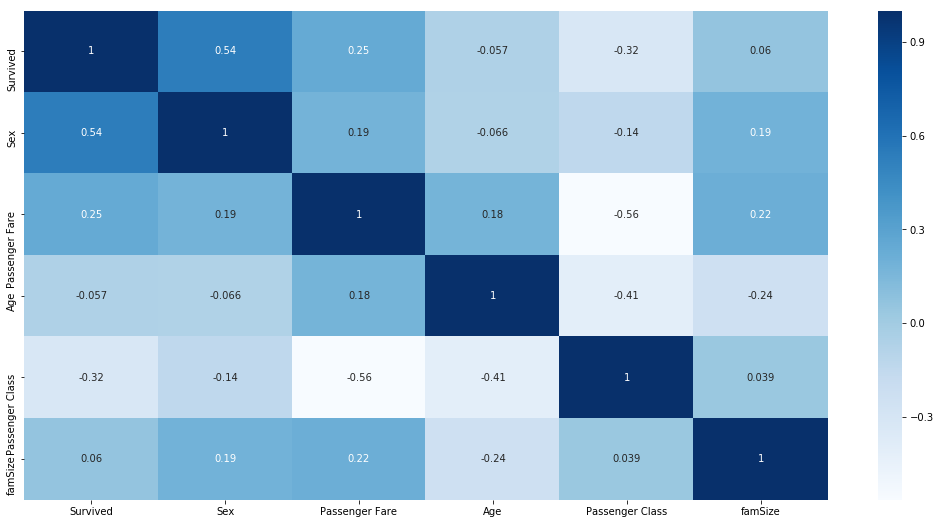

In [328]:
plt.subplots(figsize=(18, 9))
sns.heatmap(corr2, cmap="Blues", annot=True)
plt.show()

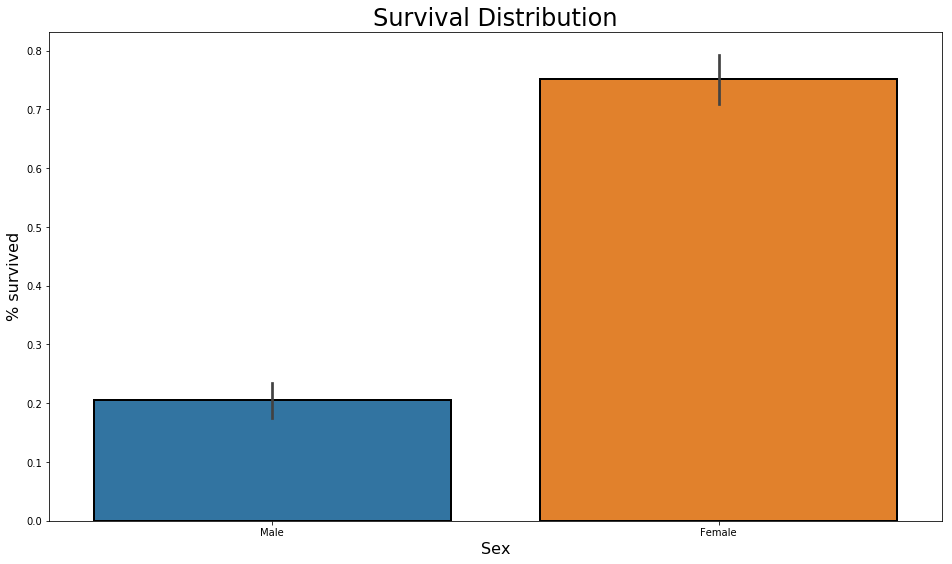

In [253]:
plt.subplots(figsize = (16, 9))
sns.barplot(x = "Sex", y = "Survived", data=numericData, edgecolor=(0,0,0), linewidth=2)
plt.title("Survival Distribution", fontsize=24)
labels = ["Male", "Female"]
plt.ylabel("% survived", fontsize = 16)
plt.xlabel("Sex", fontsize=16)
plt.xticks(sorted(numericData.Sex.unique()), labels)
plt.show()

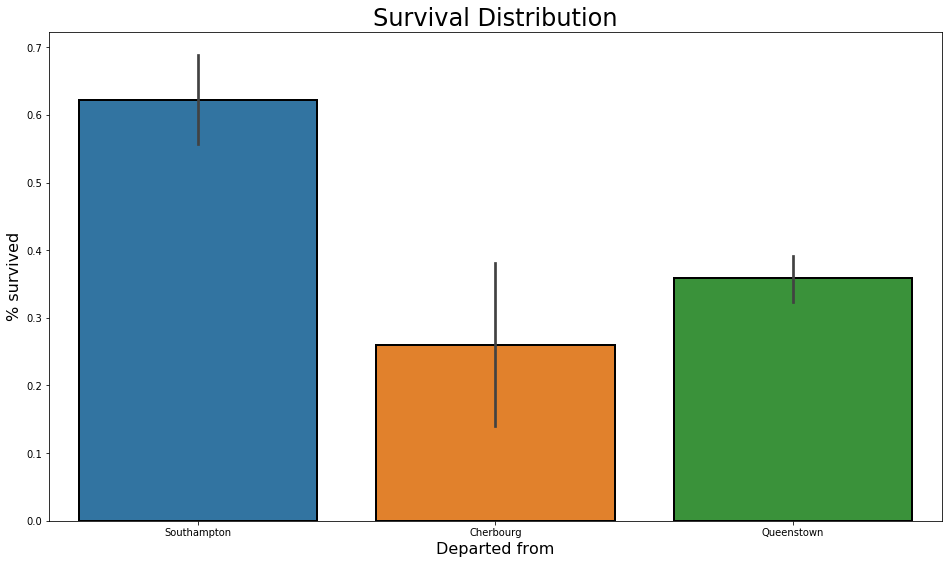

In [259]:
plt.subplots(figsize = (16, 9))
sns.barplot(x = "Port of Embarkation", y = "Survived", data=numericData, edgecolor=(0,0,0), linewidth=2)
plt.title("Survival Distribution", fontsize=24)
labels = ["Southampton", "Cherbourg", "Queenstown"]
plt.ylabel("% survived", fontsize = 16)
plt.xlabel("Departed from", fontsize=16)
plt.xticks(sorted(numericData['Port of Embarkation'].unique()), labels)
plt.show()

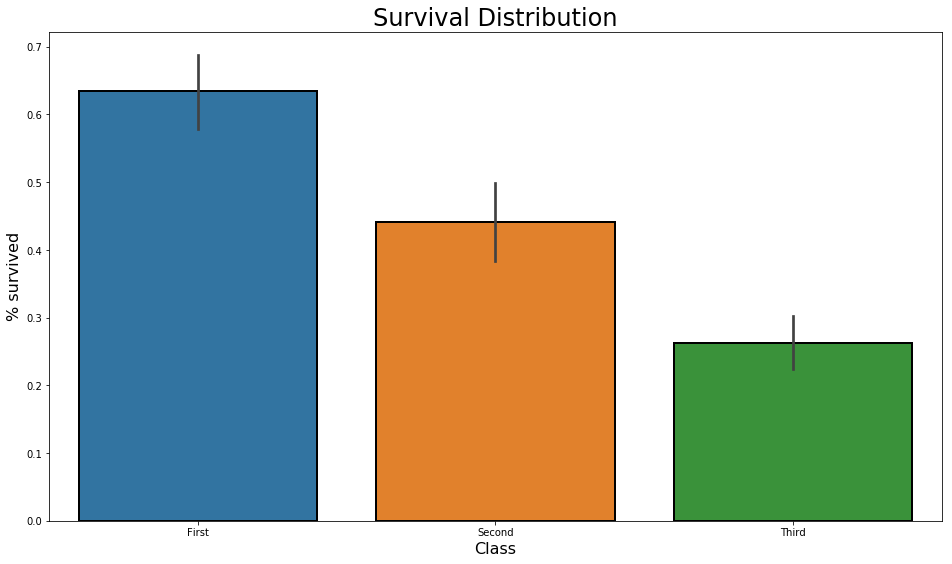

In [261]:
plt.subplots(figsize = (16, 9))
sns.barplot(x = "Passenger Class", y = "Survived", data=numericData, edgecolor=(0,0,0), linewidth=2)
plt.title("Survival Distribution", fontsize=24)
labels = ["First", "Second", "Third"]
plt.ylabel("% survived", fontsize = 16)
plt.xlabel("Class", fontsize=16)
plt.xticks(sorted(numericData['Passenger Class'].unique()), labels)
plt.show()

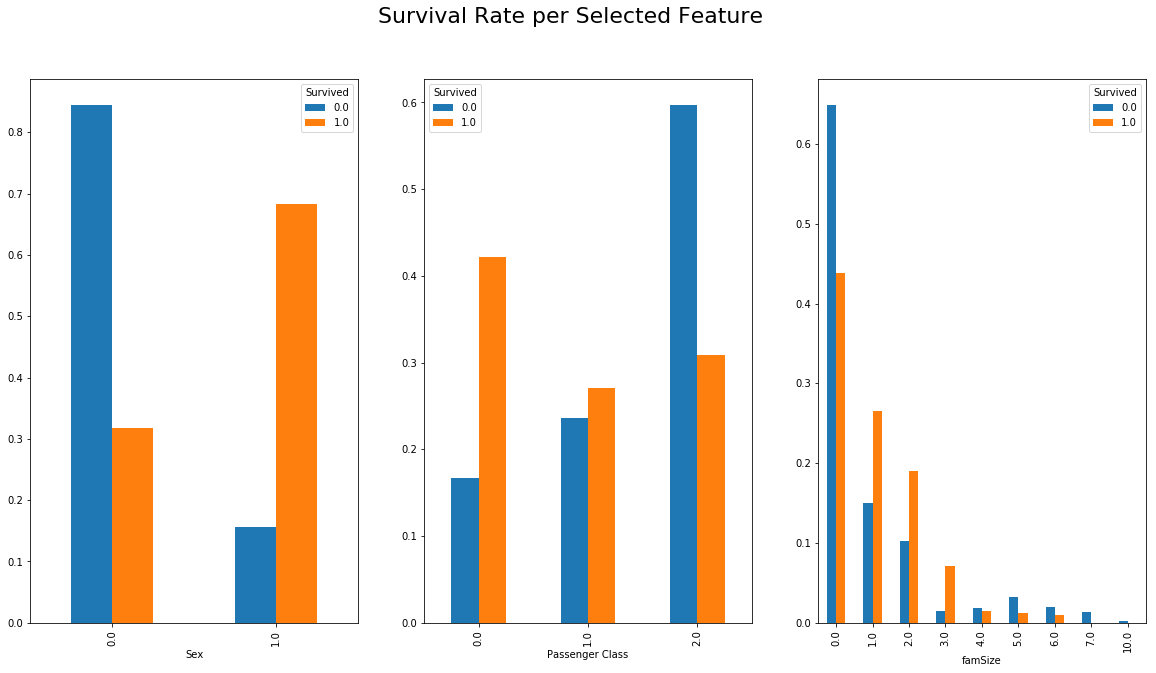

In [321]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,10)
plt.suptitle('Survival Rate per Selected Feature', fontsize=22)


d = numericData.groupby(['Sex', 'Survived']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = numericData.groupby(['Passenger Class', 'Survived']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = numericData.groupby(['famSize', 'Survived']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

In [283]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score